In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
class_b = pd.read_csv('class B.csv')

In [3]:
sales = pd.read_csv('sales.csv')

In [4]:
sales.head()

,New SKU,Brand,Upstream Contact,Type,Location,W1,W2,W3,W4,W5,...,W1.1,W2.1,W3.1,W4.1,W5.1,W6.1,W7.1,W8.1,W9.1,W10.1
0,GN1063121-Z-WH2203,Woodsworth,Saffron Art & Craft,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GN1063121-Z-WH2305,Woodsworth,Suncity Handicrafts Pvt Ltd,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GN1576961-Z-WH19706,Mudramark,WOODENMOOD,HB-SW,Mumbai,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GN1576961-Z-WH32492,Mudramark,Woodenmood,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,2
4,GN7828171-Z-WH19566,Woodsworth,Incredible Handicrafts and Minerals,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
class_b.columns

Index(['class B'], dtype='object')

In [6]:
class_b.columns = ['New SKU'] #replacing that column

In [7]:
class_b.head()

,New SKU
0,GN6378471-Z-WH31628
1,GN8720861-Z-WH32479
2,GN1664471-Z-WH21497
3,GN3076661-Z-WH32491
4,GN5673261-Z-WH4248


In [8]:
sales_b = pd.merge(sales,class_b, how='inner', on= 'New SKU')

In [9]:
sales_b.to_csv('sales_bdata.csv')

**Forecast**

In [12]:
class_b_forecast = pd.read_csv('class_bFinal.csv')

In [13]:
class_b_forecast.head()

,week,sales
0,03-01-2019,10
1,10-01-2019,20
2,17-01-2019,18
3,24-01-2019,27
4,31-01-2019,26


In [14]:
#Convert month into date and time
class_b_forecast['week'] = pd.to_datetime(class_b_forecast['week'])

In [15]:
#week as a index
class_b_forecast.set_index('week', inplace = True)

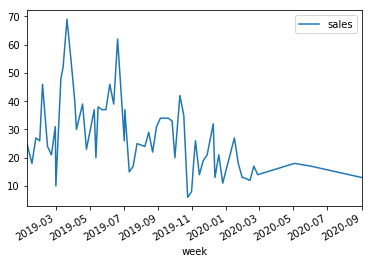

In [16]:
class_b_forecast.plot()
#In the below graph the data doesnot show any seasonality and also its not stationary since there is no trend in the series

In [17]:
#testing for stationary
from statsmodels.tsa.stattools import adfuller

In [18]:
test_result = adfuller(class_b_forecast['sales'])
#adfuller gives 5 different values (ADF Test statistic', 'p-value', 'Lags used', 'Number of observations used)
#it will defined in labels downwards (Dickey-Fuller Test)

In [19]:
#H0 - it is not stationary (null hypothesis)
 #H1 - It is stationary

#if p is less than 0.05, then we can reject the null hypothesis. so it is stationary
def ad_fuller(sales):
    result = adfuller(sales) #it calculates all the relevant 4 values
    labels = ['ADF Test statistic', 'p-value', '#Lags used', 'Number of observations used'] #creating a output
    for value,label in zip(result, labels): #using zip to collect all values result and the labels altogether
        print (label+' : '+str(value) )
    if result[1] <= 0.05:
        print("We reject the null hypothesis. Data is stationary.")
    else:
        print("We can not reject null hypothesis. Data is not stationary")

In [20]:
ad_fuller(class_b_forecast['sales'])

ADF Test statistic : -1.7204021318790057
p-value : 0.420632522995062
#Lags used : 4
Number of observations used : 57
We can not reject null hypothesis. Data is not stationary


**Differentitation**

In [21]:
class_b_forecast['sales after first diff.'] = np.log(class_b_forecast['sales']) #doing first order differentiation

In [22]:
ad_fuller(class_b_forecast['sales after first diff.']) #checking now, still data is not stationary.

ADF Test statistic : -3.687382617496873
p-value : 0.004294170148960927
#Lags used : 0
Number of observations used : 61
We reject the null hypothesis. Data is stationary.


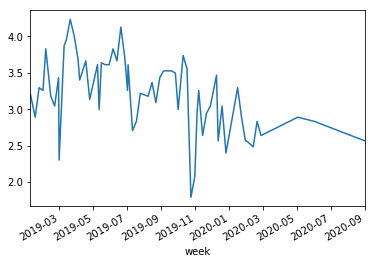

In [23]:
class_b_forecast['sales after first diff.'].plot()

**Auto Regressive Model**

In [24]:
from pandas.plotting import autocorrelation_plot

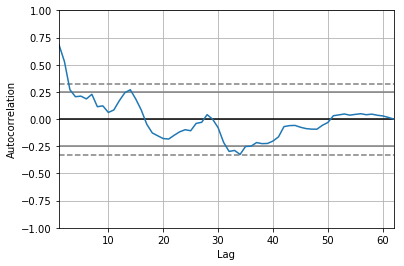

In [25]:
autocorrelation_plot(class_b_forecast['sales'])
plt.show()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #autocorelation or partial auto correlation
import statsmodels.api as sm

C:\Users\AKASH\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


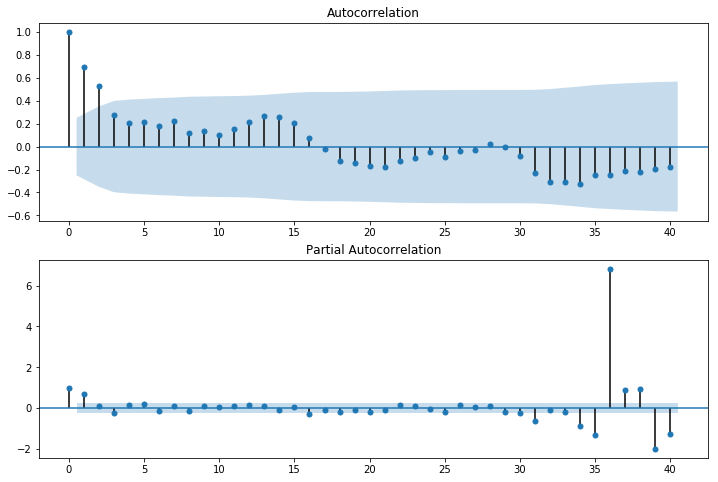

In [27]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(class_b_forecast['sales'].iloc[1:], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(class_b_forecast['sales'].iloc[1:], lags = 40, ax = ax2)
# for ARIMA, we need p,q,d
#p = 1 from partial coorelation FOR AR value
#q = 1 from Auto correlation model (no exponential decrease in 1st graph. so we are more inclined towards auto regressive)1
#d = 0 from differencing done only 1 time

In [28]:
from statsmodels.tsa.arima_model import ARIMA

In [29]:
model = ARIMA(class_b_forecast['sales'], order = (1,0,1)) #(p,d,q)
model_fit = model.fit()

C:\Users\AKASH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\AKASH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  sales   No. Observations:                   62
Model:                     ARMA(1, 1)   Log Likelihood                -227.785
Method:                       css-mle   S.D. of innovations              9.483
Date:                Thu, 02 Apr 2020   AIC                            463.571
Time:                        02:17:40   BIC                            472.079
Sample:                             0   HQIC                           466.911
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          26.5333      4.232      6.270      0.000      18.239      34.828
ar.L1.sales     0.7535      0.107      7.024      0.000       0.543       0.964
ma.L1.sales    -0.1021      0.144     -0.707      0.479      -0.385       0.181
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3271           +0.0000j            1.3271            0.0000
MA.1            9.7914           +0.0000j            9.7914            0.0000
-----------------------------------------------------------------------------
"""

In [31]:
class_b_forecast.tail(15)

,sales,sales after first diff.
week,,
2019-11-28,21,3.044522
2019-05-12,20,2.995732
2019-12-12,13,2.564949
2019-12-19,21,3.044522
2019-12-26,11,2.397895
2020-02-01,13,2.564949
2020-09-01,13,2.564949
2020-01-16,27,3.295837
2020-01-23,18,2.890372


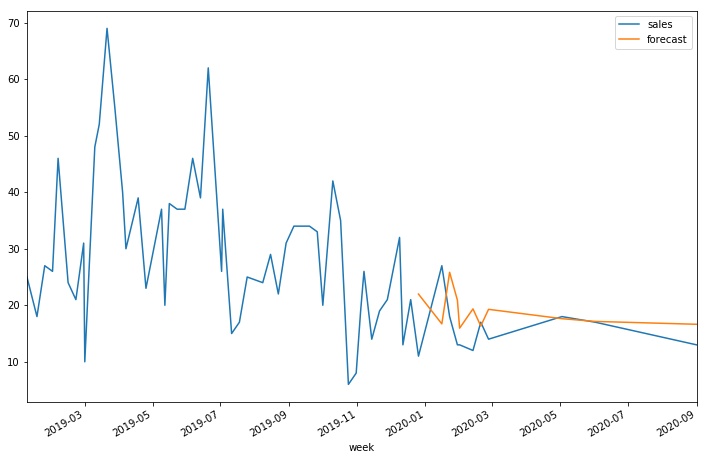

In [32]:
class_b_forecast['forecast']=model_fit.predict(start='2019-12-26',end='2020-05-03')
class_b_forecast[['sales','forecast']].plot(figsize=(12,8))

In [33]:
farima = class_b_forecast['forecast']['2019-12-26' : ]
actual = class_b_forecast['sales']['2019-12-26' :]

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(actual, farima)
mae = mean_absolute_error(actual, farima)
print('Mean Squared Error of Amberville Brand Using Arima: %f' % mse)
print('Mean Absolute Error of Amberville Brand Using Arima: %f' % mae)

Mean Squared Error of Amberville Brand Using Arima: 41.362732
Mean Absolute Error of Amberville Brand Using Arima: 5.220239


In [47]:
farima

week
2019-12-26    21.979748
2020-02-01    15.949938
2020-09-01    16.636903
2020-01-16    16.707063
2020-01-23    25.833757
2020-01-30    20.903312
2020-06-02    17.142791
2020-02-13    19.364309
2020-02-20    16.334218
2020-02-27    19.281729
2020-05-03    17.628574
Name: forecast, dtype: float64

**For 6 months**

In [41]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=24)[0]

In [42]:
forecast

array([20.06531691, 21.65951837, 22.86078888, 23.76597612, 24.44805725,
       24.96202237, 25.34930788, 25.64113716, 25.86103779, 26.02673839,
       26.15159792, 26.24568269, 26.3165779 , 26.36999921, 26.4102535 ,
       26.4405861 , 26.46344248, 26.48066533, 26.49364317, 26.5034223 ,
       26.51079112, 26.51634371, 26.52052772, 26.52368048])

In [44]:
class_b_outofsample = pd.DataFrame(data=forecast, columns=['Forecast']) #putting into dataframe

In [45]:
class_b_outofsample

,Forecast
0,20.065317
1,21.659518
2,22.860789
3,23.765976
4,24.448057
5,24.962022
6,25.349308
7,25.641137
8,25.861038
9,26.026738
